In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [30]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc5e223507bb637e1c2d92105db08930


In [32]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | richards bay
Processing Record 12 of Set 1 | kulu
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | matsanga
City not found. Skipping...
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | arraial do cabo
Processing Record

Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | capaccio
Processing Record 42 of Set 4 | zakamensk
Processing Record 43 of Set 4 | corning
Processing Record 44 of Set 4 | innisfail
Processing Record 45 of Set 4 | nisia floresta
Processing Record 46 of Set 4 | manawar
Processing Record 47 of Set 4 | bedford
Processing Record 48 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | jalu
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | manokwari
Processing Record 4 of Set 5 | celestun
Processing Record 5 of Set 5 | kaeo
Processing Record 6 of Set 5 | ambilobe
Processing Record 7 of Set 5 | havre
Processing Record 8 of Set 5 | makakilo city
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | blonduos
City not found. Skipping...
Processing Record 11 of Set 5 | weligama
Processing Record 12 of Set 5 | parauna
Processing Record 13 

Processing Record 28 of Set 8 | ixtapa
Processing Record 29 of Set 8 | fare
Processing Record 30 of Set 8 | uribia
Processing Record 31 of Set 8 | rong kwang
Processing Record 32 of Set 8 | whitehorse
Processing Record 33 of Set 8 | mayumba
Processing Record 34 of Set 8 | awjilah
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | tarime
Processing Record 37 of Set 8 | baruun-urt
Processing Record 38 of Set 8 | zlobin
Processing Record 39 of Set 8 | takaka
Processing Record 40 of Set 8 | aflu
City not found. Skipping...
Processing Record 41 of Set 8 | kaligutan
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | qingdao
Processing Record 44 of Set 8 | lukovetskiy
Processing Record 45 of Set 8 | ustye
Processing Record 46 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 8 | nanortalik
Processing Record 48 of Set 8 | saint-pierre
Processing Record 49 of Set 8 | boyolangu
Processing Record 50 of Set 8 | pimentel
Processing

Processing Record 14 of Set 12 | bundaberg
Processing Record 15 of Set 12 | itapecerica
Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | honiara
Processing Record 18 of Set 12 | pyay
Processing Record 19 of Set 12 | xai-xai
Processing Record 20 of Set 12 | tabou
Processing Record 21 of Set 12 | homer
Processing Record 22 of Set 12 | gavle
Processing Record 23 of Set 12 | hami
Processing Record 24 of Set 12 | abha
Processing Record 25 of Set 12 | arona
Processing Record 26 of Set 12 | buritizeiro
Processing Record 27 of Set 12 | keuruu
Processing Record 28 of Set 12 | la serena
Processing Record 29 of Set 12 | matias olimpio
Processing Record 30 of Set 12 | abonnema
Processing Record 31 of Set 12 | lahij
Processing Record 32 of Set 12 | saint anthony
Processing Record 33 of Set 12 | oltedal
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | sao geraldo do araguaia
Processing Record 36 of Set 12 | huanren
Processing Record 37 of Set 1

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,50.86,96,100,1.54,NZ,2021-10-23 18:36:23
1,Hilo,19.7297,-155.0900,74.25,96,90,5.75,US,2021-10-23 18:33:06
2,Rikitea,-23.1203,-134.9692,74.77,82,96,20.58,PF,2021-10-23 18:36:24
3,Busselton,-33.6500,115.3333,52.09,79,100,5.64,AU,2021-10-23 18:36:24
4,Hermanus,-34.4187,19.2345,57.90,70,7,5.91,ZA,2021-10-23 18:36:24
5,Hobyo,5.3505,48.5268,79.61,79,37,11.79,SO,2021-10-23 18:36:25
6,Tasiilaq,65.6145,-37.6368,33.96,89,100,4.23,GL,2021-10-23 18:36:25
7,Longyearbyen,78.2186,15.6401,19.24,86,75,5.75,SJ,2021-10-23 18:36:25
8,Dikson,73.5069,80.5464,9.82,87,98,12.91,RU,2021-10-23 18:36:26
9,Jamestown,42.0970,-79.2353,51.08,87,90,1.99,US,2021-10-23 18:32:05


In [76]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,2021-10-23 18:36:23,-46.1333,167.6833,50.86,96,100,1.54
1,Hilo,US,2021-10-23 18:33:06,19.7297,-155.0900,74.25,96,90,5.75
2,Rikitea,PF,2021-10-23 18:36:24,-23.1203,-134.9692,74.77,82,96,20.58
3,Busselton,AU,2021-10-23 18:36:24,-33.6500,115.3333,52.09,79,100,5.64
4,Hermanus,ZA,2021-10-23 18:36:24,-34.4187,19.2345,57.90,70,7,5.91
5,Hobyo,SO,2021-10-23 18:36:25,5.3505,48.5268,79.61,79,37,11.79
6,Tasiilaq,GL,2021-10-23 18:36:25,65.6145,-37.6368,33.96,89,100,4.23
7,Longyearbyen,SJ,2021-10-23 18:36:25,78.2186,15.6401,19.24,86,75,5.75
8,Dikson,RU,2021-10-23 18:36:26,73.5069,80.5464,9.82,87,98,12.91
9,Jamestown,US,2021-10-23 18:32:05,42.0970,-79.2353,51.08,87,90,1.99


In [77]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

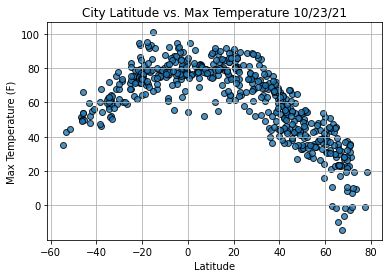

In [79]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

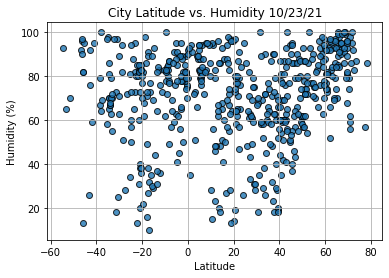

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

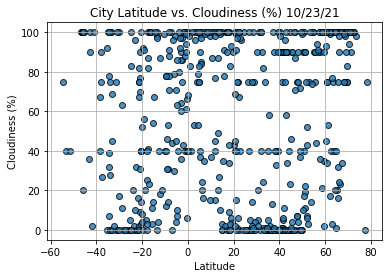

In [81]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

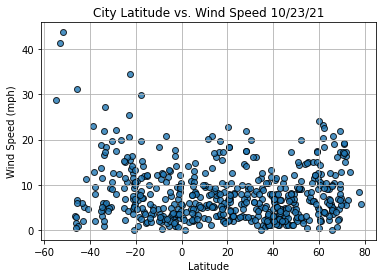

In [82]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()